In [1]:
from qiskit import *  #import all qiskit libraries

We will work with a 2 qubit quantum circuit (quantum register)

In [2]:
# new quantum register with two qubits
qr = QuantumRegister(2)

now we need a classical register to take measurements from these qubits

In [3]:
cr = ClassicalRegister(2)

now create a circuit using these two registers

In [4]:
circuit = QuantumCircuit(qr, cr) #parameters: quantum register and classical register

use `matplotlib` inline to draw things

draw the circuit

In [5]:
circuit.draw() # drawing without matplotlib

q0_0: 
      
q0_1: 
      
c0: 2/

add a Hadamard gate ( `.h(<the qubit>)` ) to the first qubit

In [6]:
circuit.h(qr[0]) # Hadamard gate

draw the circuit using matplotlib ( `mpl` )

(note: you will also need to `pip install pylatexenc` to draw the circuit.  Then close Notebook and open again)

In [7]:
%matplotlib inline

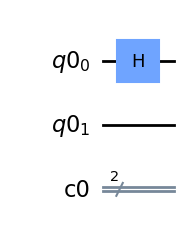

In [8]:
circuit.draw(output='mpl')

create a controlled NOT gate (`cx`) between two qubits.  It's like an if this than that statement.  Used to entangle (and detangle) Bell states.

In [9]:
circuit.cx(qr[0], qr[1])

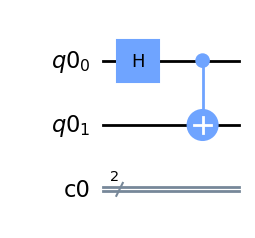

In [14]:
circuit.draw(output='mpl')

In [15]:
circuit.measure(qr, cr)

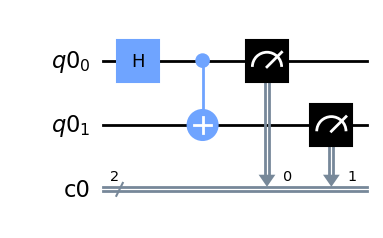

In [16]:
circuit.draw(output='mpl')

In [17]:
?circuit.draw

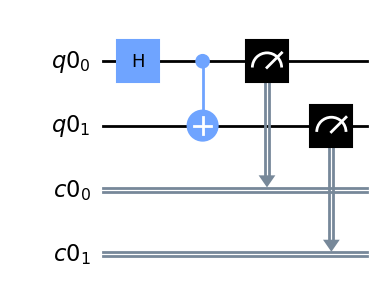

In [21]:
circuit.draw(output='mpl', cregbundle=False) #cregbundle (classical register bundling) default True

use a QASM simulator imported from `Aer`.  QASM stands for "quantum assembly language".

In [22]:
simulator = Aer.get_backend('qasm_simulator')

execute the circuit with `execute`.  Pass the `circuit` and the `backend` I want to use (in this case `simulator`).  `shots` (number of times it runs) defaults to `1024`.

In [46]:
result = execute(circuit, backend = simulator, shots = 2000).result()

bring in some qiskit __visualization tools__

In [25]:
from qiskit.tools.visualization import plot_histogram

view the results (counts)

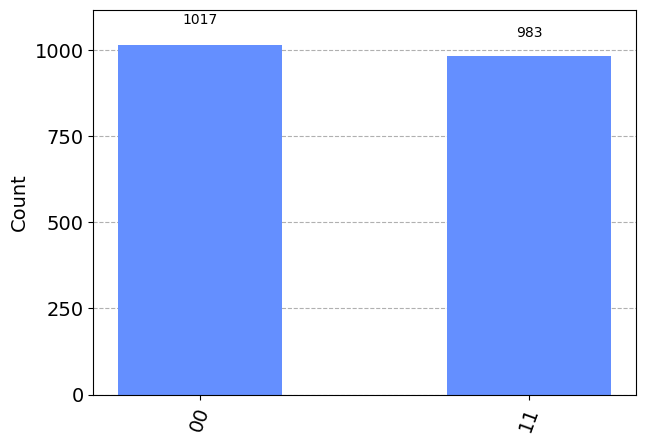

In [47]:
plot_histogram(result.get_counts(circuit))

## run on quantum computer

first load my account

NOTE: I already put my API token in (see My Qiskit Install)

In [48]:
IBMQ.load_account()

/var/folders/bq/fvvldy095vz80qbkf7d8zz2h0000gp/T/ipykernel_97207/485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/var/folders/bq/fvvldy095vz80qbkf7d8zz2h0000gp/T/ipykernel_97207/485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [49]:
provider = IBMQ.get_provider('ibm-q')

get a list of backend providers

In [55]:
from qiskit.tools.monitor import backend_overview

In [56]:
backend_overview()

ibm_oslo                     ibm_perth                    ibm_nairobi
--------                     ---------                    -----------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 137            Pending Jobs: 142            Pending Jobs: 42
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      113.6          Avg. T1:      185.1          Avg. T1:      124.5
Avg. T2:      114.2          Avg. T2:      122.4          Avg. T2:      74.2



ibm_lagos                    ibmq_manila                  ibmq_jakarta
---------                    -----------                  ------------
Num. Qubits:  7              Num. Qubits:  5              Num. Qubits:  7
Pending Jobs: 44             Pending Jobs: 115            Pending Jobs: 61
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           

Get the quantum computer we have chosen

In [58]:
q_comp = provider.get_backend('ibmq_quito')

run the job

In [59]:
job = execute(circuit, backend=q_comp)

monitor the job

In [53]:
from qiskit.tools.monitor import job_monitor

In [60]:
job_monitor(job)

Job Status: job has successfully run


when done, get the results of the job

In [61]:
result = job.result()

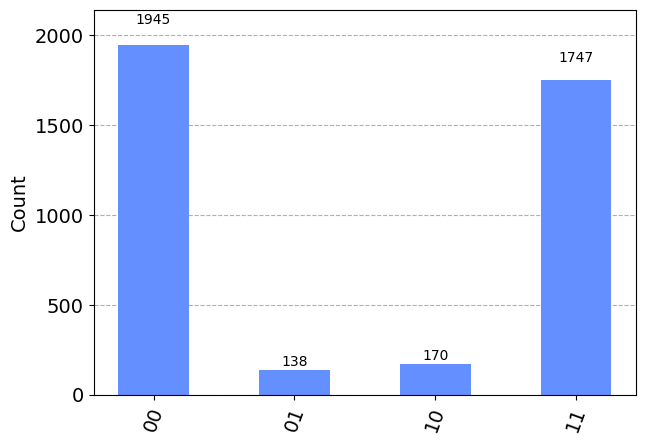

In [62]:
plot_histogram(result.get_counts(circuit))